# [Module 2.3] SKLearn XGBoost 훈련 및 추론

이 노트북은 아래와 같은 작업을 합니다.
- 훈련, 검증 데이터 로딩
- 훈련, 검증 데이터의 X, y 로 분리
- XGBoost 로 훈련
- 테스트 데이터 로딩 및 추론
- 모델 평가
- 피쳐 Importance 추출

In [1]:
import pandas as pd

In [2]:
%store -r te_pre_train_file
%store -r te_pre_test_file

## 훈련, 검증 데이터 로딩

In [3]:
train_df = pd.read_csv(te_pre_train_file, header=None, skiprows=1)

In [4]:
from IPython.display import display
display(train_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3,29.99,10.96,9000.0,2640.0,1,4,10,2.175063,2.625703,2.068789,1.797406,1.730057,2.183227,1.619101,2.163043,2.262911,1.775514,2.134582
1,2,23.90,26.82,1500.0,14625.0,1,4,10,2.180955,2.243557,2.073626,2.219753,2.209925,2.172901,3.152118,2.188721,2.222551,3.150102,2.164053
2,4,249.90,17.59,610.0,4928.0,1,4,10,2.182587,2.028565,2.151057,2.141850,2.113293,2.136123,2.626927,2.155294,2.369897,2.487868,2.171569
3,4,89.90,17.51,1850.0,10764.0,1,4,10,2.185584,2.194091,2.113418,1.960980,2.178909,2.196817,2.642480,2.155102,2.648678,2.473836,2.183380
4,2,93.90,17.61,1200.0,12500.0,1,4,10,2.170692,2.238277,2.477206,2.152751,2.179731,2.169582,2.831505,2.163499,2.472426,2.549165,2.147510


## 훈련, 검증의 X, y 값의 분리

In [5]:
X_train, y_train = train_df.iloc[:,1:], train_df.iloc[:,0]
# X_val, y_val = val_df.iloc[:,1:], val_df.iloc[:,0]

## XGBoost 훈련

### XGBoost Parameters
- https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

In [6]:
import xgboost as xgb

xgb_et = xgb.XGBClassifier(objective='multi:softmax',
                          colsample_bytree = 0.3,
                           max_depth = 10, alpha = 10, 
                           n_estimators = 200)
xgb_et.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
# xgb_et.score(X_val, y_val)

## 테스트 데이터 로딩 및 추론

In [8]:
test_df = pd.read_csv(te_pre_test_file, header=None,skiprows=1)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3,105.00,23.89,1000.0,7632.0,1,19,6,2.391845,2.234761,2.124288,2.107862,2.672263,2.209053,2.180187,2.186401,2.523131,2.703099,2.213403
1,0,99.97,15.80,650.0,9600.0,1,19,6,2.170855,2.035820,2.354760,1.977483,2.142477,2.198389,2.317828,2.130447,1.643000,1.788799,2.190784
2,3,76.99,23.34,1850.0,3000.0,1,19,6,2.168951,1.923805,2.112038,1.928440,2.186759,2.190161,2.617422,2.166904,2.159153,2.521050,2.172353
3,2,64.90,15.55,200.0,4752.0,1,19,6,2.144415,2.179984,2.078391,1.911920,2.192858,2.534707,2.640869,2.197390,2.466845,2.501713,2.181140
4,4,75.00,27.51,2550.0,31500.0,1,19,6,2.176373,2.230431,2.132108,1.916739,2.201885,2.170277,2.812890,2.188364,2.797829,2.789558,2.146462


In [9]:
X_test, y_test = test_df.iloc[:,1:], test_df.iloc[:,0]

In [10]:
prediction = xgb_et.predict(X_test)

## 모델 평가

In [11]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, prediction)
f1_score = f1_score(y_test, prediction, average='macro')
print("accuracy: %.2f%%" % accuracy)
print("f1_score: %.2f%%" % f1_score)

accuracy: 0.43%
f1_score: 0.42%


[[ 934  472  262   31    6]
 [ 334 1379 1616  719  114]
 [ 192  479 2220 1153  491]
 [  62  178  602 1035  291]
 [  18   49  248  278  273]]


<Figure size 432x288 with 0 Axes>

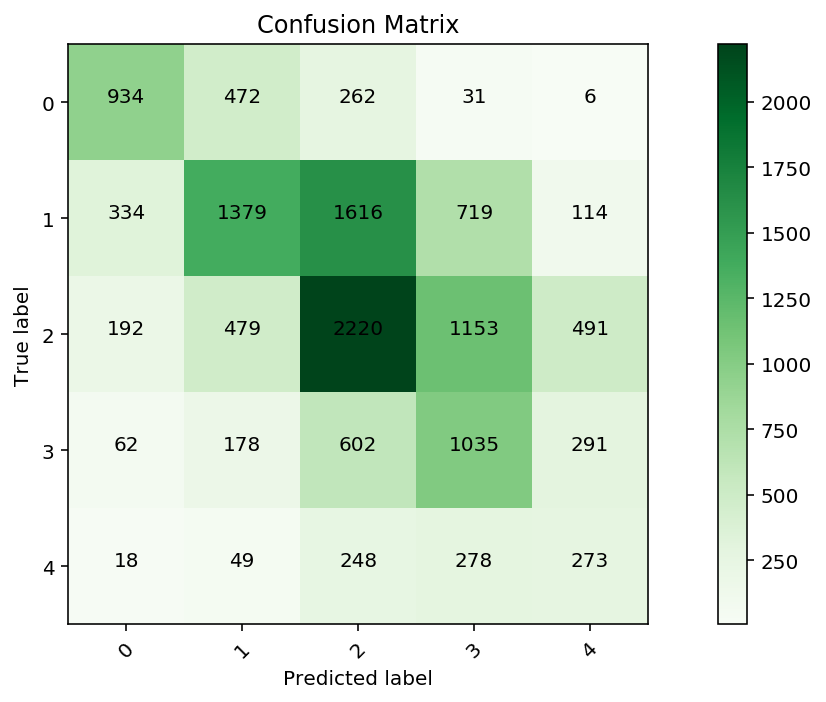

In [13]:
from p_utils import plot_conf_mat


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

cm = confusion_matrix(y_true= y_test, y_pred= prediction)

plt.figure()
fig, ax = plt.subplots(figsize=(10,5))
plot_conf_mat(cm, 
              classes=['0','1', '2', '3', '4'], 
              title='Confusion Matrix')
plt.show()

## Feature Importance

In [14]:
test_col_df = pd.read_csv(te_pre_test_file)
features = test_col_df.columns[1:]
features


Index(['price', 'freight_value', 'product_weight_g', 'product_volume',
       'order_weekday', 'order_day', 'order_month',
       'te_product_id_mean_smoothed',
       'te_product_category_name_english_mean_smoothed',
       'te_seller_state_mean_smoothed', 'te_seller_city_mean_smoothed',
       'te_seller_zip_code_prefix_mean_smoothed',
       'te_customer_seller_city_mean_smoothed',
       'te_customer_seller_state_mean_smoothed',
       'te_customer_seller_zip_code_prefix_mean_smoothed',
       'te_customer_city_mean_smoothed', 'te_customer_state_mean_smoothed',
       'te_customer_zip_code_prefix_mean_smoothed'],
      dtype='object')

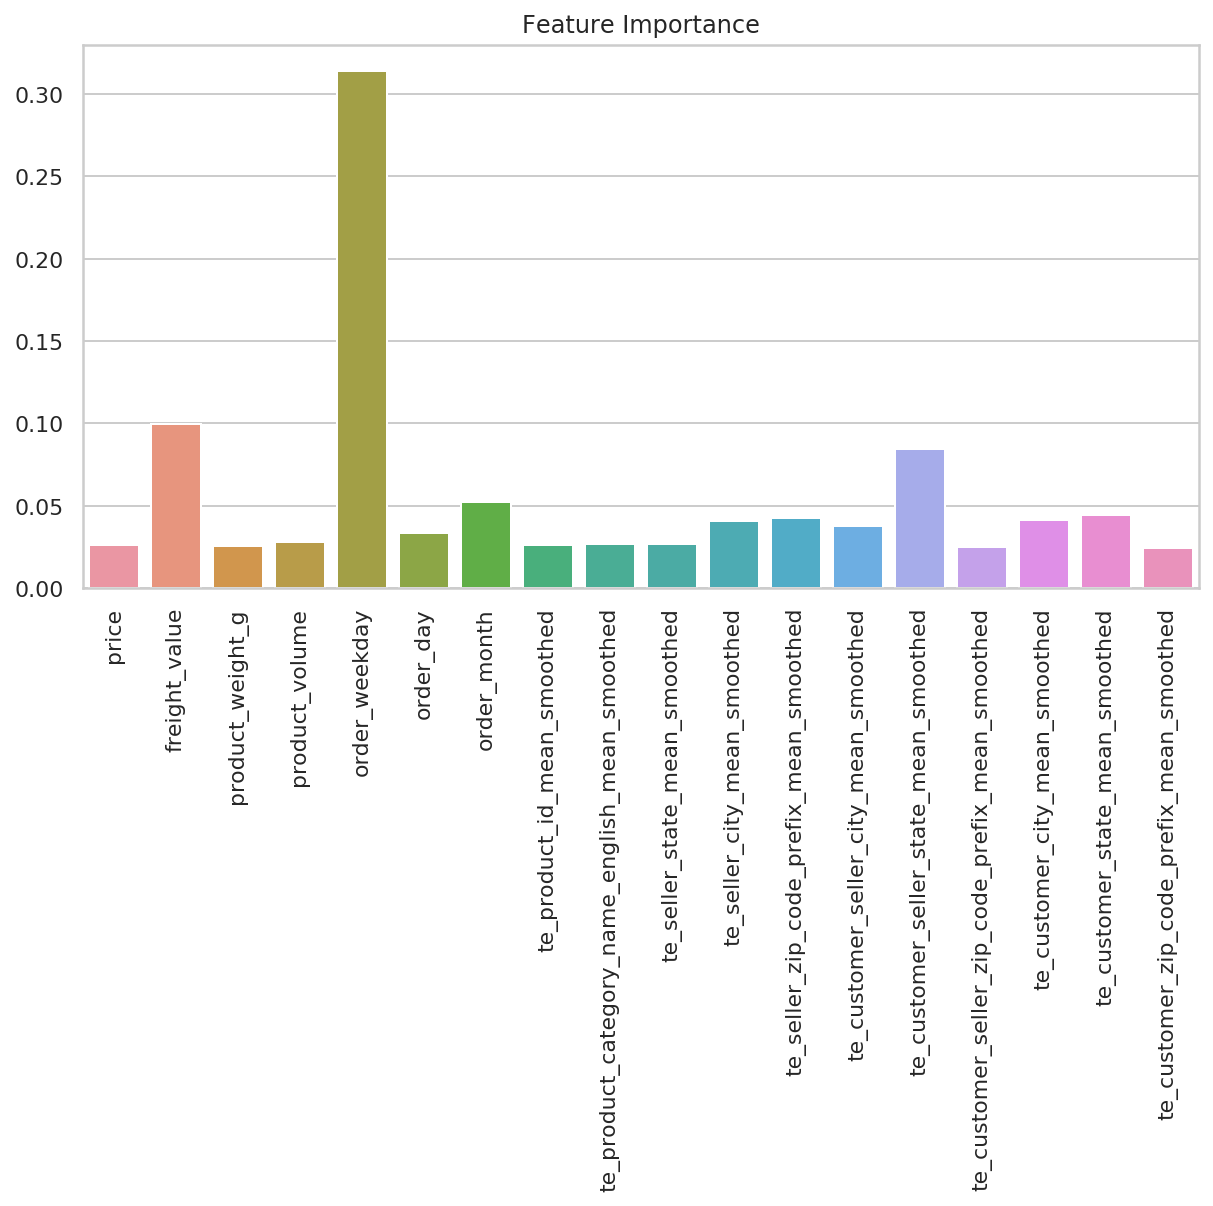

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


test_col_df = pd.read_csv(te_pre_test_file)
features = test_col_df.columns[1:]
fea_importance = xgb_et.feature_importances_

f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x=features, y= fea_importance)
ax.set_title('Feature Importance')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()